In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import matplotlib.image as implt
from PIL import Image 
import seaborn as sns
import cv2 as cs2
import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "/kaggle/input/cat-dog-dataset/Cat_Dog_data/train"
test_path = "/kaggle/input/cat-dog-dataset/Cat_Dog_data/test"

train_cats = "/kaggle/input/cat-dog-dataset/Cat_Dog_data/train/cat"
test_cats = "/kaggle/input/cat-dog-dataset/Cat_Dog_data/test/cat"

train_dogs = "/kaggle/input/cat-dog-dataset/Cat_Dog_data/train/dog"
test_dogs = "/kaggle/input/cat-dog-dataset/Cat_Dog_data/test/dog"

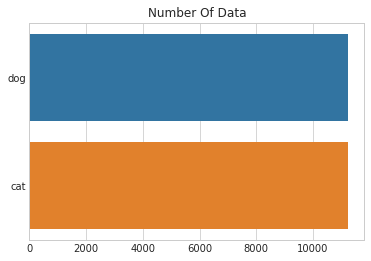

In [3]:
category_names = os.listdir(train_path) # CAT / DOG
leng_category = len(category_names) # 2
train_images = []

for category in category_names:
    folder = train_path + "/" + category
    train_images.append(len(os.listdir(folder)))
    
sns.barplot(y = category_names, x = train_images).set_title("Number Of Data");

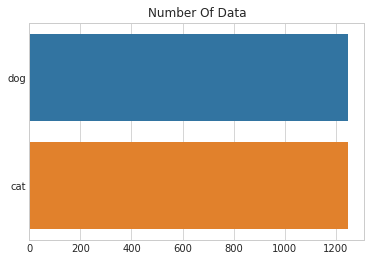

In [4]:
test_images = []

for category in category_names:
    folder = test_path + "/" + category
    test_images.append(len(os.listdir(folder)))

sns.barplot(y=category_names, x=test_images).set_title("Number Of Data");

(-0.5, 498.5, 374.5, -0.5)

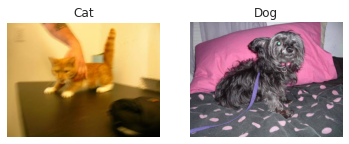

In [5]:
imgcat = implt.imread(train_cats + "/cat.0.jpg")
imgdog = implt.imread(train_dogs + "/dog.0.jpg")

plt.subplot(1,2,1)
plt.title('Cat')
plt.imshow(imgcat)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Dog')
plt.imshow(imgdog)
plt.axis('off')

In [6]:
img_size = 50
cats_train = []
dogs_train = []
label = []

for i in os.listdir(train_cats): # Train cat images
    if os.path.isfile(train_path + "/cat/" + i): 
        cats = Image.open(train_path + "/cat/" + i).convert("L") # Converting grey scale 
        cats = cats.resize((img_size,img_size), Image.ANTIALIAS) # Resizing to 50,50
        cats = np.asarray(cats) / 255
        cats_train.append(cats)
        label.append(1) # Label 1 for cat
        
for i in os.listdir(train_dogs): # Train dog images
    if os.path.isfile(train_path + "/dog/" + i):
        dogs = Image.open(train_path + "/dog/" + i).convert("L") # Converting grey scale 
        dogs = dogs.resize((img_size,img_size), Image.ANTIALIAS) # Resizing to 50,50
        dogs = np.asarray(dogs) / 255
        dogs_train.append(dogs)
        label.append(0) # Label 0 for dog

In [7]:
x_train = np.concatenate((cats_train, dogs_train), axis=0) # Training dataset
x_train_label = np.asarray(label) # Label array containing 0 and 1
x_train_label = x_train_label.reshape(x_train_label.shape[0],1)

print("Cats:",np.shape(cats_train) , "Dogs:",np.shape(dogs_train))
print("Train Dataset:",np.shape(x_train), "Train Values:",np.shape(x_train_label))

Cats: (11250, 50, 50) Dogs: (11250, 50, 50)
Train Dataset: (22500, 50, 50) Train Values: (22500, 1)


In [8]:
img_size = 50
cats_test = []
dogs_test = []
label = []

for i in os.listdir(test_cats): # Test cat images
    if os.path.isfile(test_path + "/cat/" + i): 
        cats = Image.open(test_path + "/cat/" + i).convert("L") # Converting grey scale 
        cats = cats.resize((img_size,img_size), Image.ANTIALIAS) # Resizing to 50,50
        cats = np.asarray(cats) / 255 
        cats_test.append(cats)
        label.append(1)
        
for i in os.listdir(test_dogs): # Test dog images
    if os.path.isfile(test_path + "/dog/" + i): 
        dogs = Image.open(test_path + "/dog/" + i).convert("L") # Converting grey scale 
        dogs = dogs.resize((img_size,img_size), Image.ANTIALIAS) # Resizing to 50,50
        dogs = np.asarray(dogs) / 255
        dogs_test.append(dogs)
        label.append(0)

In [ ]:
x_test = np.concatenate((cats_test, dogs_test), axis=0) # Test dataset
x_test_label = np.asarray(label) # Label array containing 0 and 1
x_test_label = x_test_label.reshape(x_test_label.shape[0],1)

print("Cats:",np.shape(cats_test) , "Dogs:",np.shape(dogs_test))
print("Test Dataset:",np.shape(x_test), "Test Values:",np.shape(x_test_label))

In [ ]:
x = np.concatenate((x_train, x_test), axis=0) 
y = np.concatenate((x_train_label, x_test_label), axis=0) 

x = x.reshape(x.shape[0], x.shape[1] * x.shape[2]) 
print("İmages:",np.shape(x), "Labels:",np.shape(y))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

print("Train Number: ", number_of_train)
print("Test Number: ", number_of_test)

In [ ]:
x_train = X_train.T
x_test = X_test.T
y_train = y_train.T
y_test = y_test.T

print("X train: ",x_train.shape)
print("X test: ",x_test.shape)
print("Y train: ",y_train.shape)
print("Y test: ",y_test.shape)

In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01) 
    b = 0.0 # Bias
    return w,b

In [ ]:
def sigmoid(z):
    y_head = 1 / (1 + np.exp(-z))
    return y_head

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    # Forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -(1-y_train)*np.log(1-y_head)-y_train*np.log(y_head)
    cost = (np.sum(loss))/x_train.shape[1] 
    
    # Backward propagation
    derivative_weight = (np.dot(x_train, ((y_head - y_train).T))) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iteration):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iteration):
        
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
                
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
        # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation = "vertical")
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    y_prediction = np.zeros((1,x_test.shape[1]))
    
    # if z is bigger than 0.5, our prediction is cat (y_head=1)
    # if z is smaller than 0.5, our prediction is dog (y_head=0)
    for i in range(z.shape[1]):
        if z[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension = x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
    
    test_acc_lr = round((100 - np.mean(np.abs(y_prediction_test - y_test)) * 100),2)
    train_acc_lr = round((100 - np.mean(np.abs(y_prediction_train - y_train))*100),2)
    
    # Print train/test Errors
    print("Train Accuracy: %", train_acc_lr)
    print("Test Accuracy: %", test_acc_lr)
    return train_acc_lr, test_acc_lr

In [ ]:
train_acc_lr, test_acc_lr = logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 2000)